<a href="https://colab.research.google.com/github/GroupARNruppin/LastFm/blob/main/LastFm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# טעינת וסקירת הנתונים
בקטע קוד זה, אנו טוענים את קובצי הנתונים ובודקים את השורות הראשונות של כל קובץ כדי להבין את המבנה שלהם.


In [20]:
import pandas as pd

# Load the datasets
targets_df = pd.read_csv('/content/data/lastfm_asia_target.csv')
edges_df = pd.read_csv('/content/data/lastfm_asia_edges.csv')

# Display the first few rows of each dataframe
print("Targets DataFrame:")
print(targets_df.head())

print("\nEdges DataFrame:")
print(edges_df.head())


Targets DataFrame:
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5

Edges DataFrame:
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478


# בניית הגרף
בקטע קוד זה, אנו יוצרים גרף ריק ומשתמשים בקובץ הקצוות להוספת הקצוות לגרף.


In [21]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph has 7624 nodes and 27806 edges


# זיהוי קהילות
בקטע קוד זה, אנו משתמשים בשיטת Louvain לזיהוי קהילות בגרף ומוסיפים את המידע על הקהילות לנתוני המשתמשים.


In [22]:
import community.community_louvain as community_louvain

# Apply the Louvain method
partition = community_louvain.best_partition(G)

# Add partition information to the targets dataframe
targets_df['community'] = targets_df['id'].map(partition)

# Display the first few rows with community information
print(targets_df.head())


   id  target  community
0   0       8          0
1   1      17          1
2   2       3         22
3   3      17          4
4   4       5          6


# ניתוח קהילות
בקטע קוד זה, אנו מנתחים את הקהילות שנמצאו ובודקים את החלוקה הגיאוגרפית של המשתמשים בכל קהילה.


In [23]:
# Group by community and analyze the geographical distribution
community_analysis = targets_df.groupby('community')['target'].value_counts().unstack().fillna(0)
print(community_analysis)


target        0     1     2      3    4      5      6     7      8     9   \
community                                                                   
0           18.0   0.0   0.0   22.0  0.0    5.0   15.0   1.0  404.0   0.0   
1            2.0   0.0   0.0    0.0  2.0    3.0   11.0   0.0    6.0   3.0   
2            6.0   1.0   0.0    0.0  0.0    9.0  433.0   3.0    5.0   1.0   
3            3.0   0.0   1.0    0.0  0.0    7.0    2.0   1.0    0.0   0.0   
4           10.0   0.0   0.0    4.0  3.0   12.0   19.0   1.0    8.0   1.0   
5            0.0   0.0   0.0    0.0  0.0    0.0    0.0   0.0    0.0   0.0   
6           26.0   0.0   0.0    5.0  4.0  322.0   36.0   3.0    9.0   2.0   
7           23.0   0.0   1.0    1.0  0.0    1.0   29.0   0.0    5.0   2.0   
8          926.0   1.0   0.0    1.0  0.0    8.0   35.0   0.0    8.0   1.0   
9            9.0   0.0   0.0    0.0  0.0    0.0    1.0   0.0    0.0   0.0   
10           5.0   0.0   1.0    0.0  0.0    3.0    2.0   1.0    1.0   0.0   

# ויזואליזציה של הגרף והקהילות
בקטע קוד זה, אנו מייצרים גרף המציג את הקהילות בצבעים שונים.


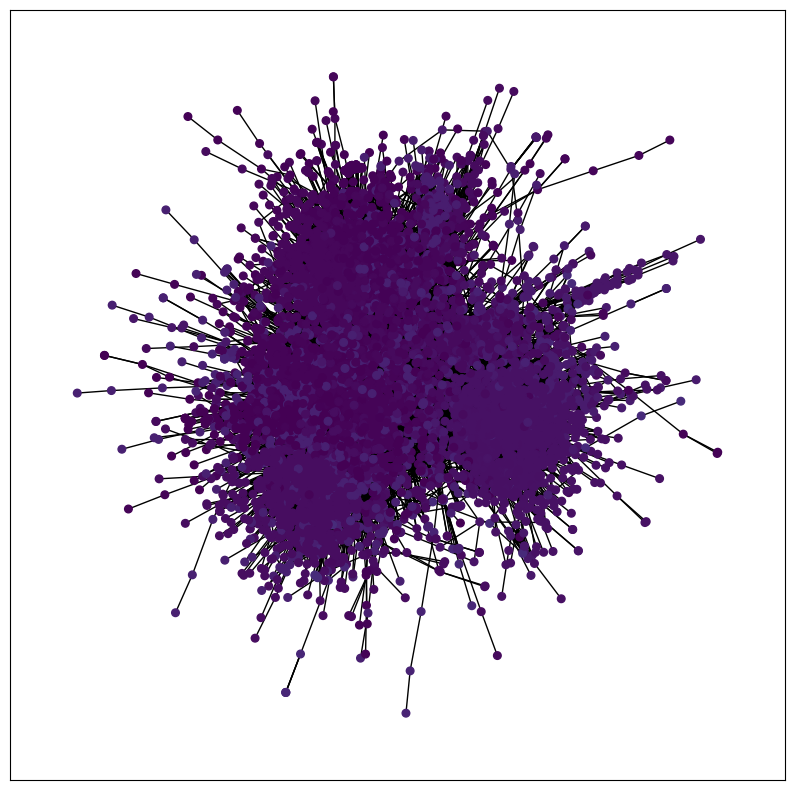

In [24]:
import matplotlib.pyplot as plt

# Draw the graph with community colors
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
colors = [cmap(partition[node]) for node in G.nodes]

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=30)
plt.show()
